# A4 - Common Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Data Filtering For Harris County

*First lets look at the data available for Harris County, Texas*

In [2]:
mask_mandate_df = pd.read_csv("./data/U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")
h_mask_mandate_df = mask_mandate_df[(mask_mandate_df.State_Tribe_Territory == "TX")&(mask_mandate_df.County_Name == "Harris County")]
h_mask_mandate_df

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
697540,TX,Harris County,48,201,5/10/2020,2,NaN,NaN,NaN,NaN
697568,TX,Harris County,48,201,5/11/2020,2,NaN,NaN,NaN,NaN
697569,TX,Harris County,48,201,5/12/2020,2,NaN,NaN,NaN,NaN
697597,TX,Harris County,48,201,5/13/2020,2,NaN,NaN,NaN,NaN
697598,TX,Harris County,48,201,5/14/2020,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1455621,TX,Harris County,48,201,8/11/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"
1455622,TX,Harris County,48,201,8/12/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"
1455623,TX,Harris County,48,201,8/13/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"
1455624,TX,Harris County,48,201,8/14/2021,2,No,Official,NaN,"Tex. Exec. Order No. GA-36 (May 18, 2021)"


In [3]:
mask_use_df = pd.read_csv("./data/mask-use-by-county.csv")
h_mask_use_df = mask_use_df[mask_use_df.COUNTYFP == 48201] #Harris County FIPS code = 48201
h_mask_use_df

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
2623,48201,0.019,0.024,0.069,0.152,0.736


In [4]:
county_metadata_df = pd.read_csv("./data/CONVENIENT_us_metadata.csv")
h_county_metadata_df = county_metadata_df[(county_metadata_df.Province_State == "Texas")&(county_metadata_df.Admin2 == "Harris")]
h_county_metadata_df

,Province_State,Admin2,Population,Lat,Long
2800,Texas,Harris,4713325,29.858649,-95.393395


In [5]:
covid_deaths_df = pd.read_csv("./data/CONVENIENT_us_deaths.csv")
# covid_deaths_df
filter_col = [col for col in covid_deaths_df if col.startswith('Texas') or col.startswith('Province_State')]
texas_covid_deaths_df = covid_deaths_df[filter_col]
new_header = texas_covid_deaths_df.iloc[0] #grab the first row for the header
texas_covid_deaths_df = texas_covid_deaths_df[1:] #take the data less the header row
texas_covid_deaths_df.columns = new_header #set the header row as the df header
h_deaths_df = texas_covid_deaths_df.loc[:,["Admin2","Harris"]]
h_deaths_df

/Users/saimuktevi/opt/anaconda3/envs/DATA558/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,2

,Admin2,Harris
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
5,1/27/20,0.0
...,...,...
645,10/28/21,14.0
646,10/29/21,31.0
647,10/30/21,7.0
648,10/31/21,14.0


In [6]:
covid_confirmed_cases_df = pd.read_csv("./data/CONVENIENT_us_confirmed_cases.csv")
filter_col = [col for col in covid_confirmed_cases_df if col.startswith('Texas') or col.startswith('Province_State')]
texas_covid_confirmed_cases_df = covid_confirmed_cases_df[filter_col]
new_header = texas_covid_confirmed_cases_df.iloc[0] #grab the first row for the header
texas_covid_confirmed_cases_df = texas_covid_confirmed_cases_df[1:] #take the data less the header row
texas_covid_confirmed_cases_df.columns = new_header #set the header row as the df header
h_confirmed_cases_df = texas_covid_confirmed_cases_df.loc[:,["Admin2","Harris"]]
h_confirmed_cases_df

/Users/saimuktevi/opt/anaconda3/envs/DATA558/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,2

,Admin2,Harris
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
5,1/27/20,0.0
...,...,...
645,10/28/21,973.0
646,10/29/21,458.0
647,10/30/21,359.0
648,10/31/21,28.0


# How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 15, 2021?

*First we plot the progression of confirmed covid cases within the described time period*

In [7]:
h_confirmed_cases_df

,Admin2,Harris
1,1/23/20,0.0
2,1/24/20,0.0
3,1/25/20,0.0
4,1/26/20,0.0
5,1/27/20,0.0
...,...,...
645,10/28/21,973.0
646,10/29/21,458.0
647,10/30/21,359.0
648,10/31/21,28.0


In [60]:
temp = h_confirmed_cases_df.copy()
temp["date"] = pd.to_datetime(h_confirmed_cases_df['Admin2'], format='%m/%d/%y')
temp["Harris"] = temp["Harris"].astype(float)
# Filter data between two dates
filtered_df = temp.loc[(temp['date'] >= '2020-02-01')
                     & (temp['date'] < '2021-10-15')]
filtered_df = filtered_df.drop(columns="Admin2").set_index('date')
filtered_df

,Harris
date,
2020-02-01,0.0
2020-02-02,0.0
2020-02-03,0.0
2020-02-04,0.0
2020-02-05,0.0
...,...
2021-10-10,476.0
2021-10-11,199.0
2021-10-12,796.0


<AxesSubplot:xlabel='Date', ylabel='Confirmed Cases'>

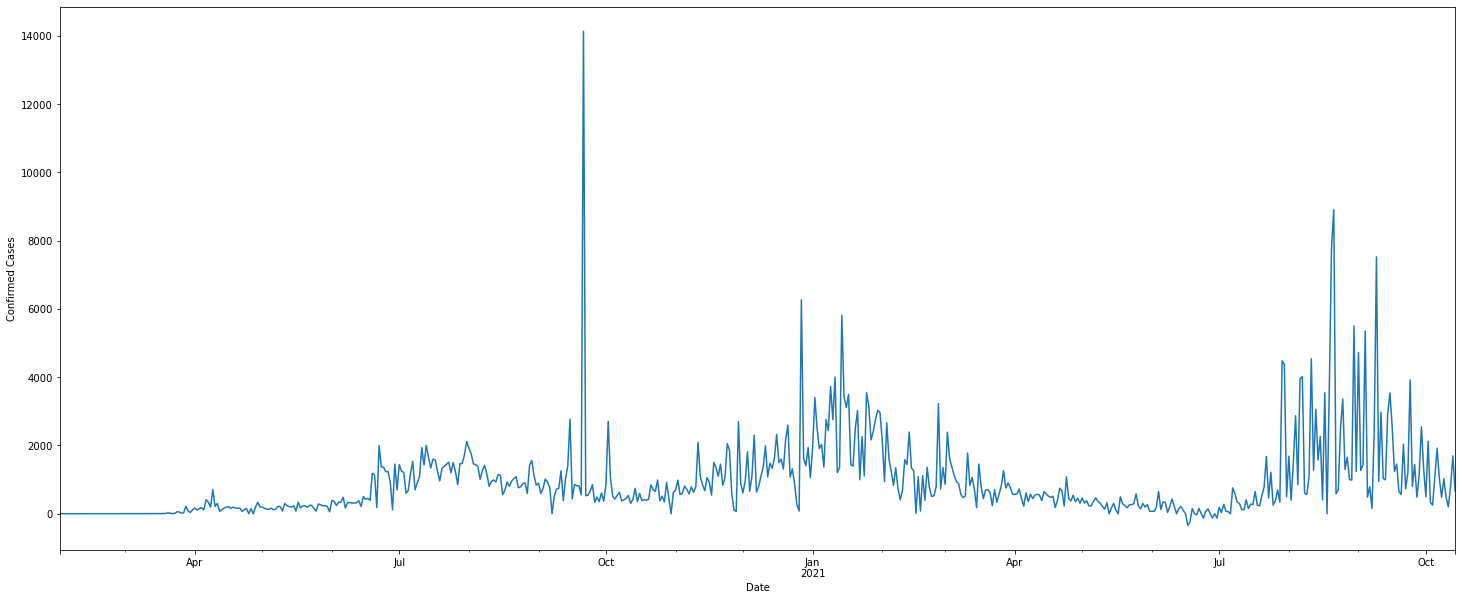

In [61]:
filtered_df.plot(xlabel="Date", ylabel="Confirmed Cases",figsize=(25,10), legend=False)

## Questions to Ponder on
(RAW or CONVENIENT?)
* What needs to be cleaned and standardized over the three datasets? - moving avg, need cummulative
* There is a delay between the time of infection and the time a case is confirmed. Many factors may contribute to such delay. People may not show symptoms right away after infection. It may take a few days for the testing results to become available especially during the early period of the pandemic. Should we model the delay? - yes model the delay by 7-10 days
* Masking may simply make it longer to get infected or it may prevent some percentage of infection. How should we consider the effect of a mask? - prevention of infection
* The research question is about how a time series changes. The infection time series is a set of slopes. Therefore the question is about a derivative function. That is, you want to answer a question about the change in slope over time. How can we test the difference in the derivative function? - test the change in slope over time, test difference in derivative function? - change in num cases per day
* Masking survey data shows probability of compliance in several categories. How can we model different proportions for population compliance? - probability of compliance shows at risk population?
* Masking policies varied in their implementation (e.g., size of “crowd” required, different situations, restaurants, bars, clubs ...). How should I handle things when my County implemented two different policies at different times? - 
* The County I was assigned did not implement a masking policy! What is a reasonable way to answer this question? That is, how might I model “voluntary” masking?
* Vaccinations probably impacted the apparent effectiveness of masks. How should we account for different vaccination rates in different populations within the same County?

### What needs to be cleaned and standardized over the three datasets?
Account for trends and make the time series stationary. Using moving averages. Graph this with color as the mask mandate.

<AxesSubplot:xlabel='Date', ylabel='Confirmed Cases'>

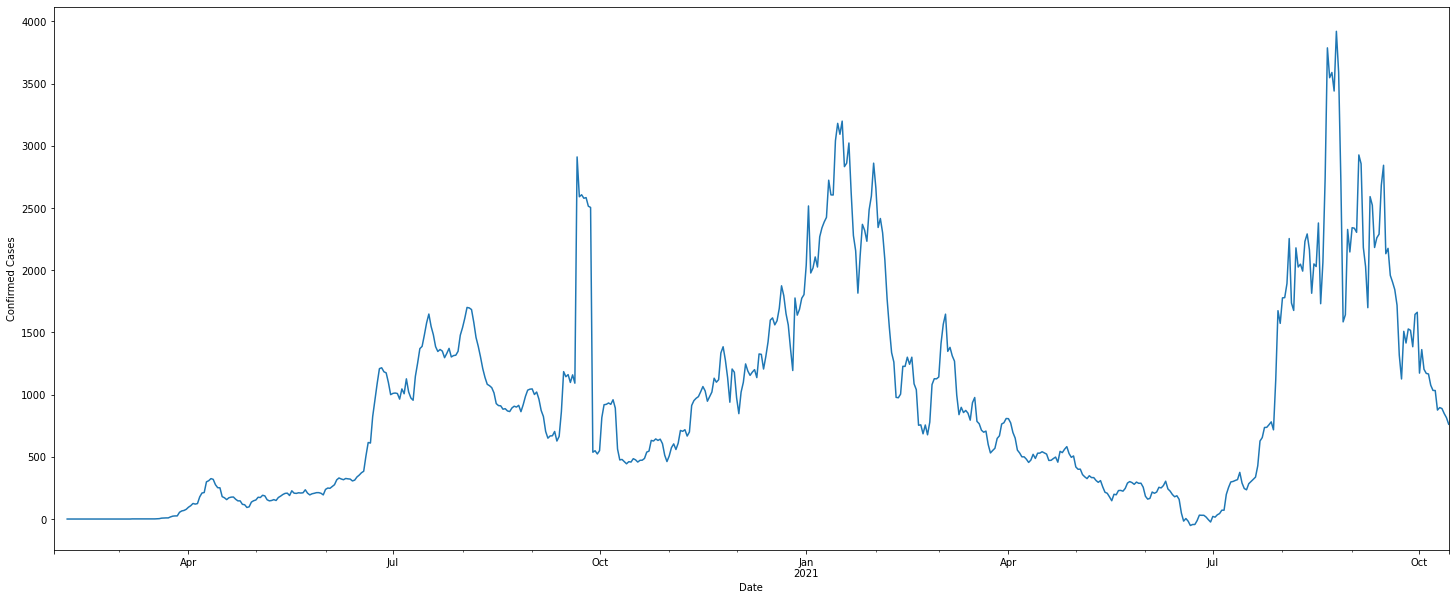

In [10]:
#using 7 day moving average
_7day_moving_avg = filtered_df["Harris"].rolling(window=7).mean().round()
_7day_moving_avg.plot(xlabel="Date", ylabel="Confirmed Cases",figsize=(25,10), legend=False)

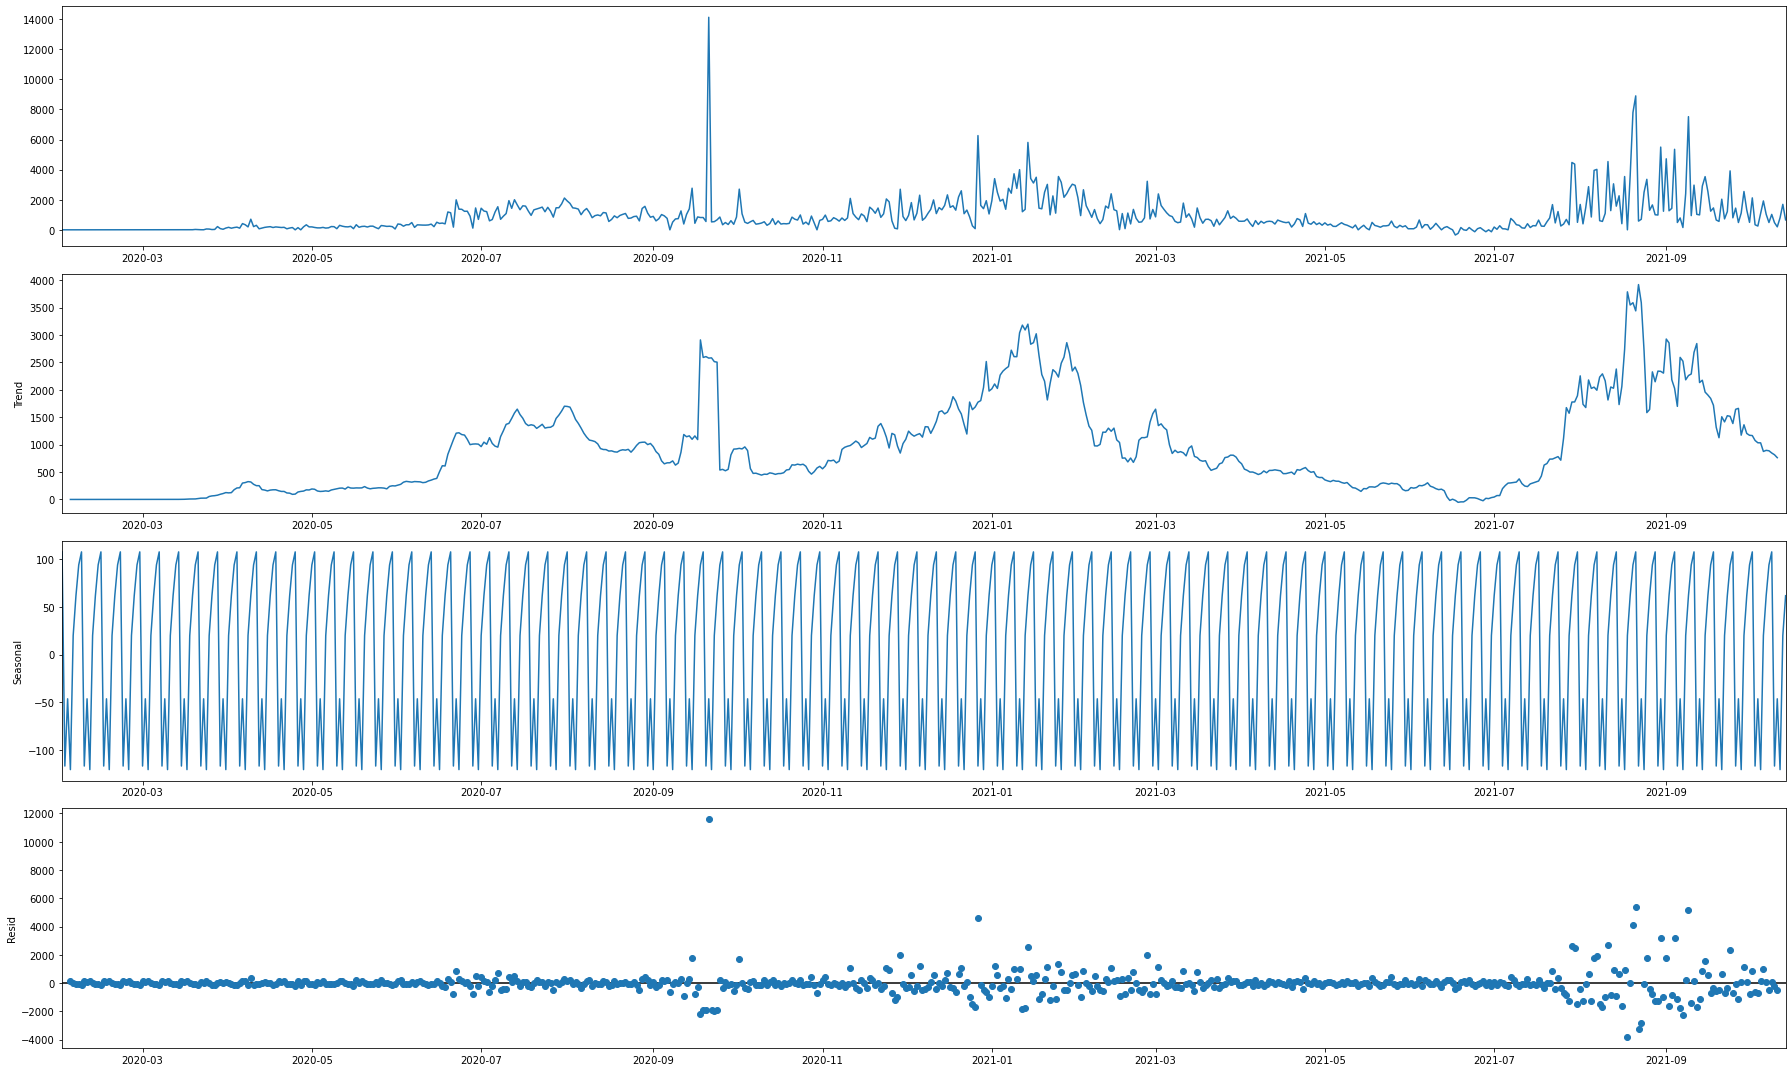

In [64]:
decomposition = sm.tsa.seasonal_decompose(filtered_df, model='additive')
plt.rcParams["figure.figsize"] = (25,15)
fig = decomposition.plot()
plt.show()

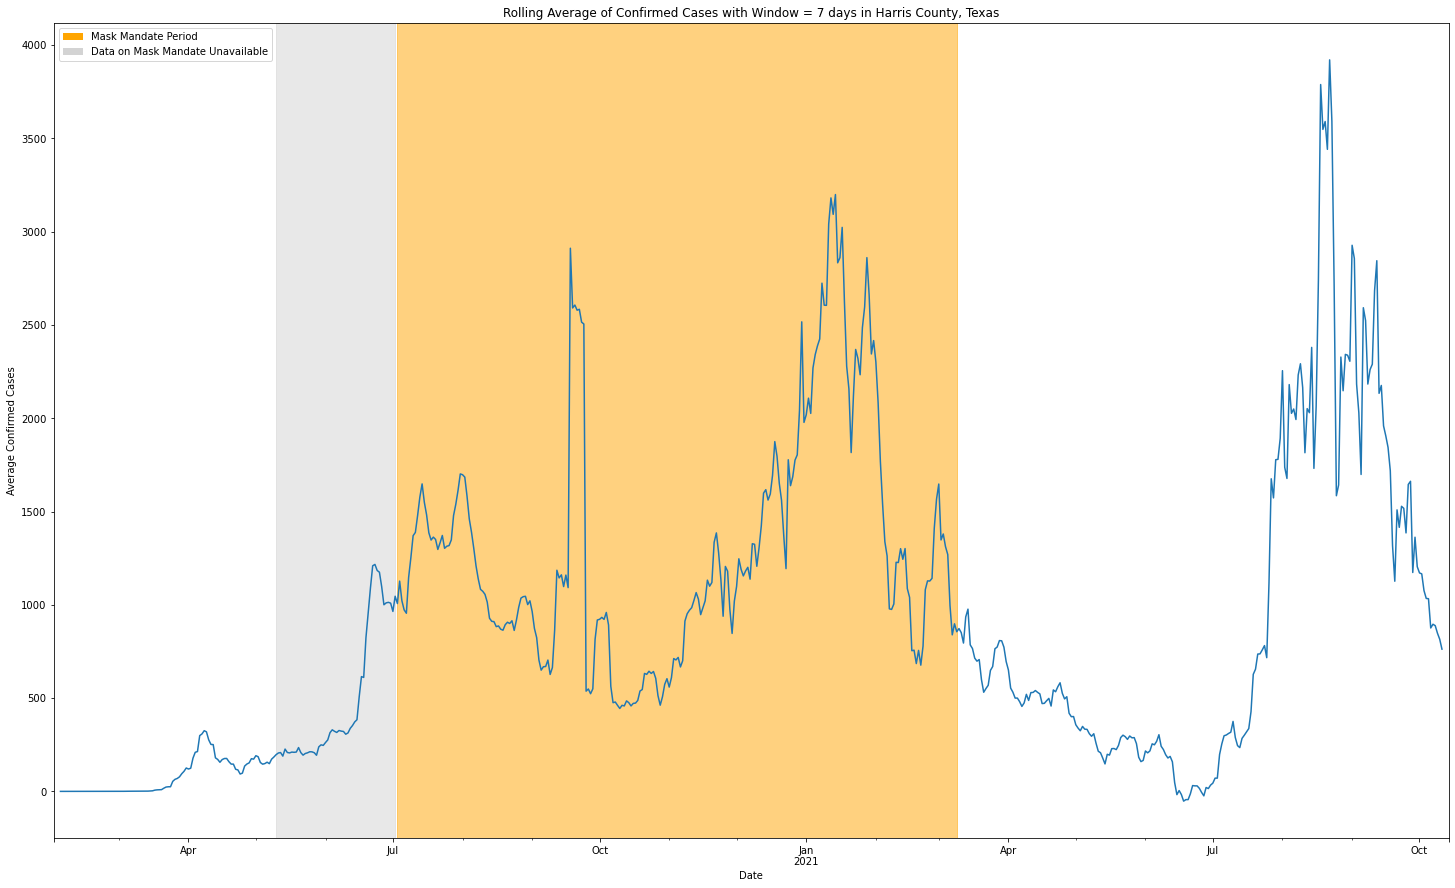

In [110]:
from matplotlib.patches import Patch
plt.rcParams["figure.figsize"] = (25,15)
decomposition.trend.plot()
plt.axvspan("2020-05-10", '2020-07-02', color='lightgray', alpha=0.5)
plt.axvspan('2020-07-03', '2021-03-09', color='orange', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Average Confirmed Cases")
plt.title("Rolling Average of Confirmed Cases with Window = 7 days in Harris County, Texas")

legend_elements = [Patch(facecolor='orange',
                         label='Mask Mandate Period'),
                  Patch(facecolor='lightgray',
                         label='Data on Mask Mandate Unavailable')]

# Create the figure
plt.legend(handles=legend_elements)
plt.show()

### Looking at mask mandate data

In [67]:
h_mask_mandate_data = h_mask_mandate_df.loc[:, ["date", "Face_Masks_Required_in_Public", "Source_of_Action"]]

temp = h_mask_mandate_data.copy()
temp["date"] = pd.to_datetime(h_mask_mandate_data['date'], format='%m/%d/%Y')
filtered_df_masks = temp.loc[(temp['date'] >= '2020-02-01')
                     & (temp['date'] < '2021-10-15')]
filtered_df_masks = filtered_df_masks.set_index('date')
filtered_df_masks

df = filtered_df_masks.join(filtered_df)
df.Face_Masks_Required_in_Public = df.Face_Masks_Required_in_Public.fillna("No")

# df.Face_Masks_Required_in_Public = df.Face_Masks_Required_in_Public.dropna()
df

,Face_Masks_Required_in_Public,Source_of_Action,Harris
date,,,
2020-05-10,No,NaN,75.0
2020-05-11,No,NaN,298.0
2020-05-12,No,NaN,240.0
2020-05-13,No,NaN,205.0
2020-05-14,No,NaN,196.0
...,...,...,...
2021-08-11,No,Official,4538.0
2021-08-12,No,Official,1276.0
2021-08-13,No,Official,3058.0


In [74]:
df_ = filtered_df_masks.join(filtered_df)
df_[df_.Face_Masks_Required_in_Public.isna()]

,Face_Masks_Required_in_Public,Source_of_Action,Harris
date,,,
2020-05-10,NaN,NaN,75.0
2020-05-11,NaN,NaN,298.0
2020-05-12,NaN,NaN,240.0
2020-05-13,NaN,NaN,205.0
2020-05-14,NaN,NaN,196.0
...,...,...,...
2020-06-28,NaN,NaN,114.0
2020-06-29,NaN,NaN,1453.0
2020-06-30,NaN,NaN,693.0


In [66]:
df[df.Face_Masks_Required_in_Public == "Yes"]

,Face_Masks_Required_in_Public,Source_of_Action,Harris
date,,,
2020-07-03,Yes,Official,1208.0
2020-07-04,Yes,Official,597.0
2020-07-05,Yes,Official,684.0
2020-07-06,Yes,Official,1179.0
2020-07-07,Yes,Official,1535.0
...,...,...,...
2021-03-05,Yes,Official,1129.0
2021-03-06,Yes,Official,947.0
2021-03-07,Yes,Official,877.0


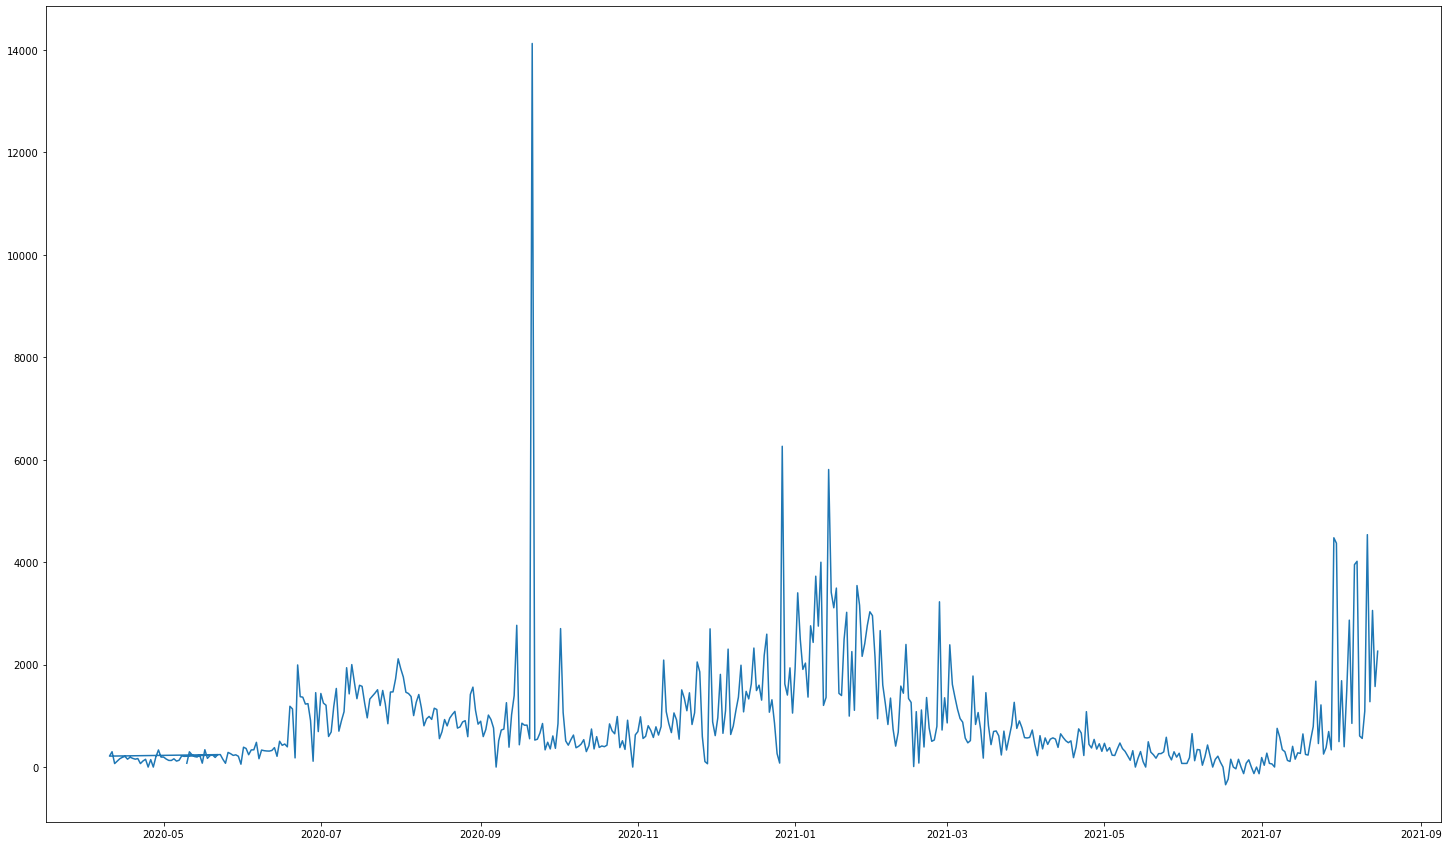

In [43]:
plt.plot(df.Harris)
plt.show() 

In [44]:
df_rolling

,Face_Masks_Required_in_Public,Source_of_Action,Harris
date,,,
2020-05-10,No,NaN,NaN
2020-05-11,No,NaN,NaN
2020-05-12,No,NaN,NaN
2020-05-13,No,NaN,NaN
2020-05-14,No,NaN,NaN
...,...,...,...
2021-08-11,No,Official,1332.0
2021-08-12,No,Official,1361.0
2021-08-13,No,Official,1458.0


In [45]:
df_rolling.index

DatetimeIndex(['2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13',
               '2020-05-14', '2020-05-15', '2020-05-16', '2020-05-17',
               '2020-05-18', '2020-05-19',
               ...
               '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
               '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13',
               '2021-08-14', '2021-08-15'],
              dtype='datetime64[ns]', name='date', length=493, freq=None)

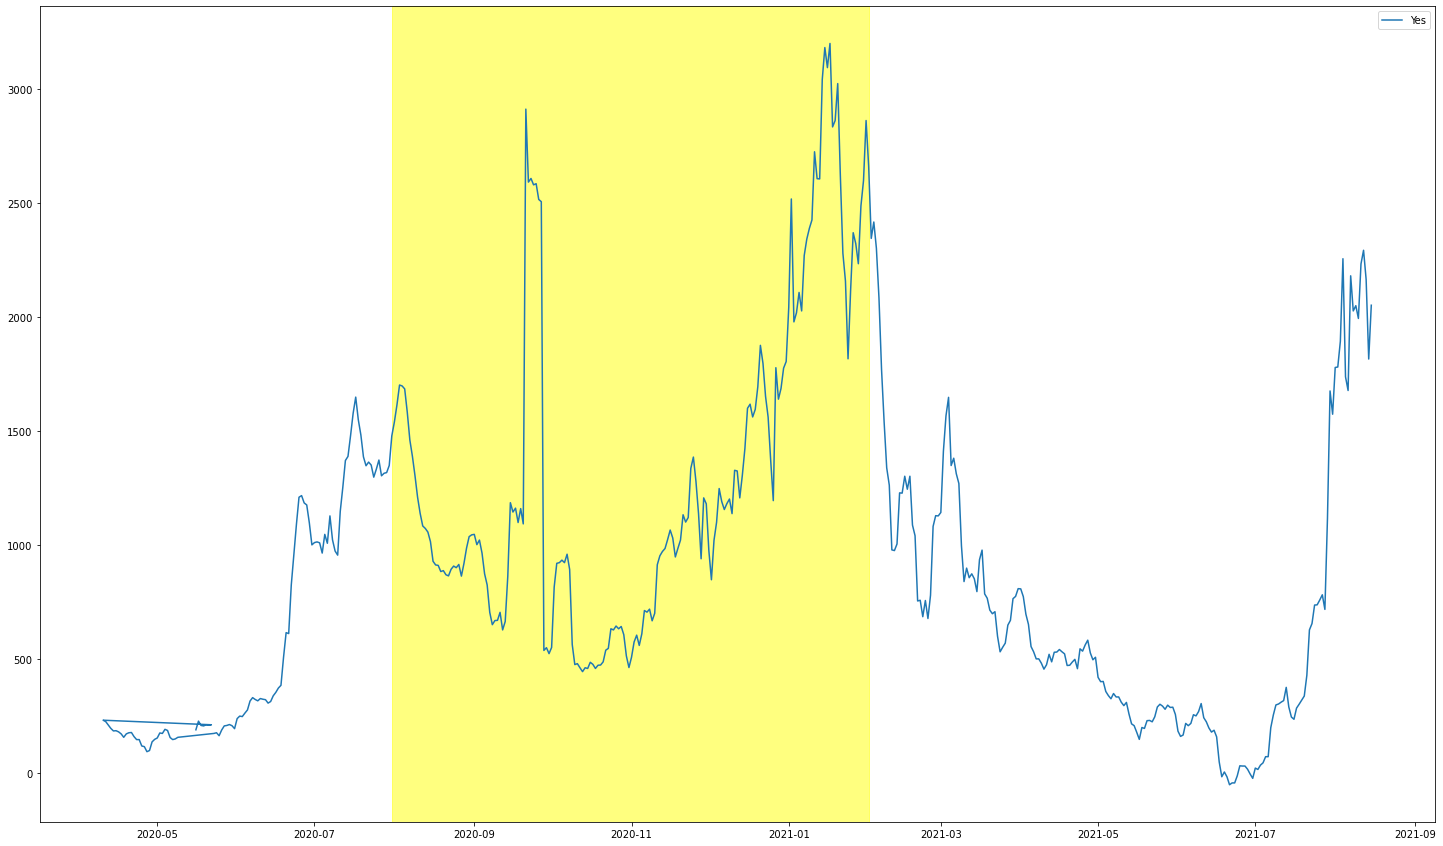

In [89]:
df_rolling = filtered_df_masks.join(filtered_df)
df_rolling.Face_Masks_Required_in_Public = df.Face_Masks_Required_in_Public.fillna("No")
df_rolling.Harris = df["Harris"].rolling(window=7).mean().round() #30 day rolling average
plt.plot(df_rolling.Harris)

# plt.plot(df_rolling.Harris[df_rolling.Face_Masks_Required_in_Public=="Yes"])
# plt.plot(df_rolling.Harris[(df_rolling.Face_Masks_Required_in_Public=="No")&(df_rolling.index>='2021-02-01')])
# plt.plot(df_rolling.Harris[(df_rolling.Face_Masks_Required_in_Public=="No")&(df_rolling.index<='2020-07-31')])
plt.legend(["Yes", "No"])
plt.axvspan('2020-07-31', '2021-02-01', color='yellow', alpha=0.5)
plt.show()

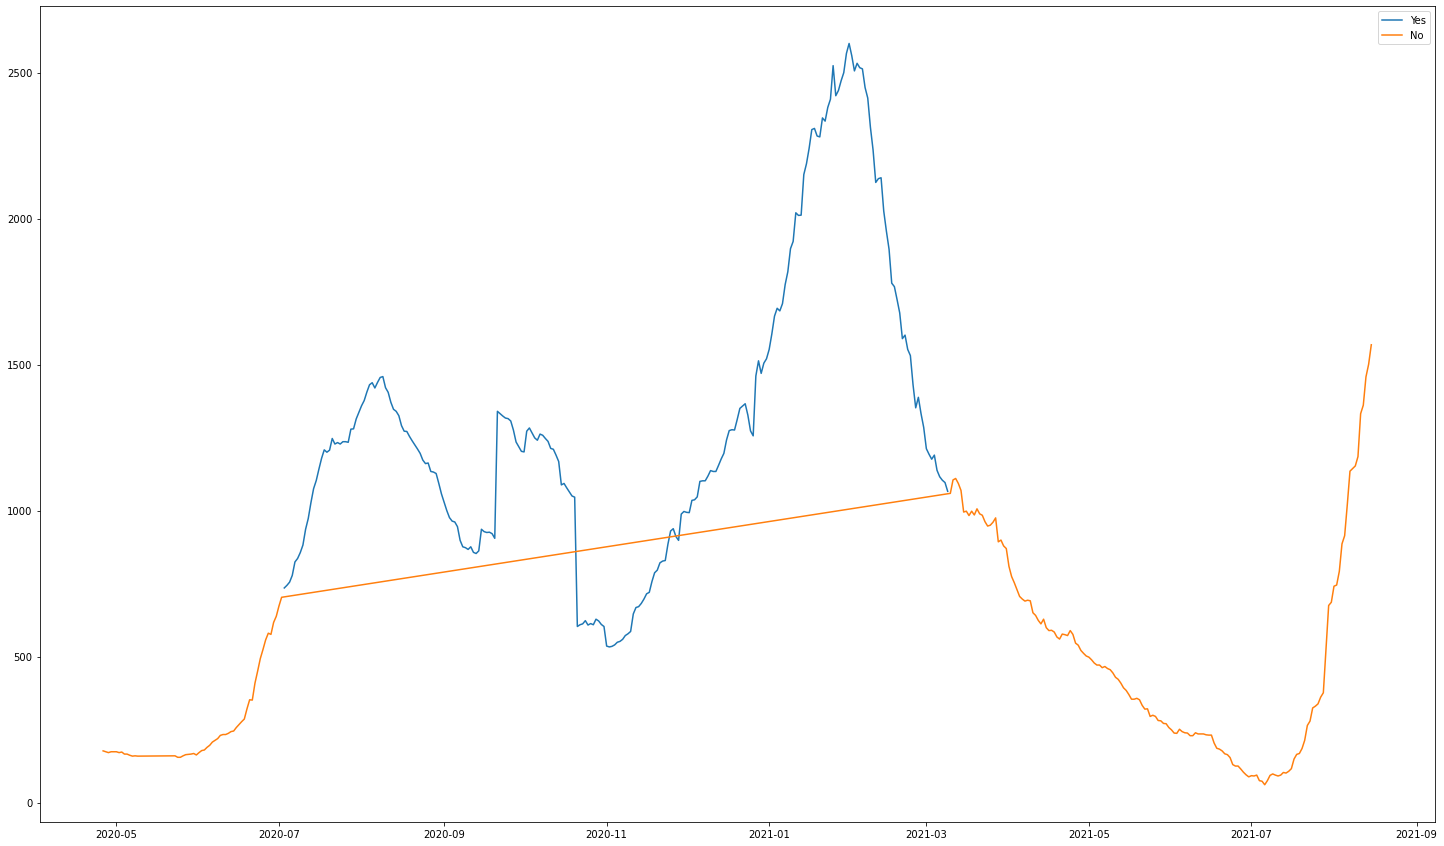

In [90]:
df_rolling = filtered_df_masks.join(filtered_df)
df_rolling.Face_Masks_Required_in_Public = df.Face_Masks_Required_in_Public.fillna("No")
df_rolling.Harris = df["Harris"].rolling(window=30).mean().round() #30 day rolling average
plt.plot(df_rolling.Harris[df_rolling.Face_Masks_Required_in_Public=="Yes"])
plt.plot(df_rolling.Harris[df_rolling.Face_Masks_Required_in_Public=="No"])
plt.legend(["Yes", "No"])
plt.show() 

In [91]:
df["Diff"] = df.Harris.diff()
df.iloc[0,-1] = 0
df

,Face_Masks_Required_in_Public,Source_of_Action,Harris,Diff
date,,,,
2020-05-10,No,NaN,75.0,0.0
2020-05-11,No,NaN,298.0,223.0
2020-05-12,No,NaN,240.0,-58.0
2020-05-13,No,NaN,205.0,-35.0
2020-05-14,No,NaN,196.0,-9.0
...,...,...,...,...
2021-08-11,No,Official,4538.0,3445.0
2021-08-12,No,Official,1276.0,-3262.0
2021-08-13,No,Official,3058.0,1782.0


In [92]:
df_rolling_diff

,Face_Masks_Required_in_Public,Source_of_Action,Harris
date,,,
2020-05-10,No,NaN,75.0
2020-05-11,No,NaN,298.0
2020-05-12,No,NaN,240.0
2020-05-13,No,NaN,205.0
2020-05-14,No,NaN,196.0
...,...,...,...
2021-08-11,No,Official,4538.0
2021-08-12,No,Official,1276.0
2021-08-13,No,Official,3058.0


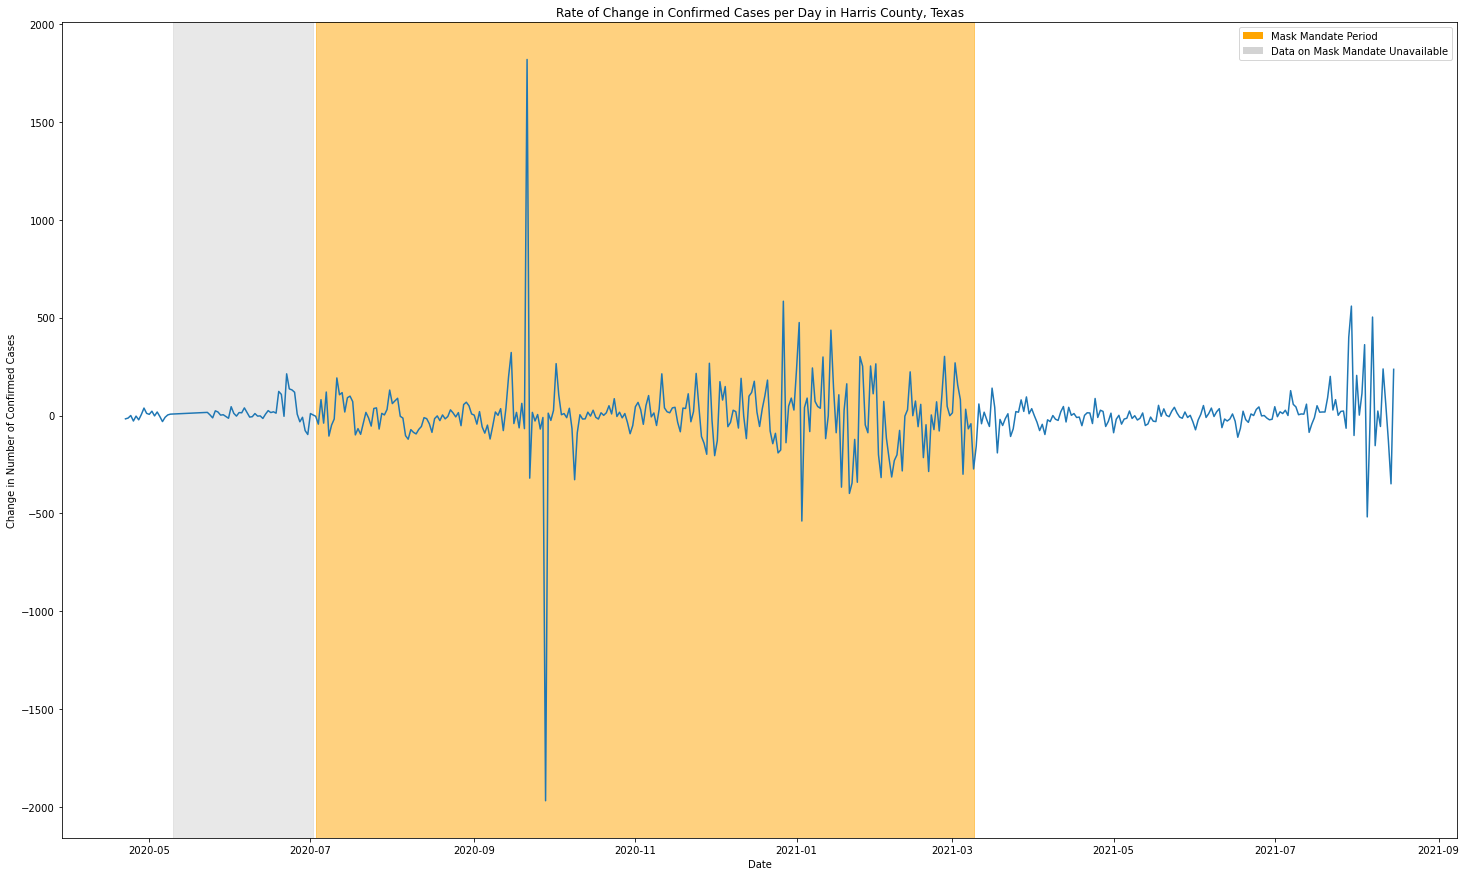

In [109]:
df_rolling_diff = df.copy()
df_rolling_diff.Diff = df.Diff.rolling(window=7).mean().round()
plt.plot(df_rolling_diff.Diff.iloc[25:])
# plt.plot(df_rolling_diff.Diff[df_rolling_diff.Face_Masks_Required_in_Public=="Yes"])
# plt.plot(df_rolling_diff.Diff[df_rolling_diff.Face_Masks_Required_in_Public=="No"])
# plt.legend(["Yes", "No"])
plt.axvspan("2020-05-10", '2020-07-02', color='lightgray', alpha=0.5)
plt.axvspan('2020-07-03', '2021-03-09', color='orange', alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Change in Number of Confirmed Cases")
plt.title("Rate of Change in Confirmed Cases per Day in Harris County, Texas")

legend_elements = [Patch(facecolor='orange',
                         label='Mask Mandate Period'),
                  Patch(facecolor='lightgray',
                         label='Data on Mask Mandate Unavailable')]

# Create the figure
plt.legend(handles=legend_elements)
plt.show()